### Advertising Efficiency Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
ADV #Sales of each product in 200 different markets and adv bugets for every product 

In [33]:
TV_SALES = ADV[['TV','sales']]
RADIO_SALES = ADV[['radio','sales']]
NEWSPAPER_SALES = ADV[['newspaper','sales']]

#### Train-Test Split

In [200]:
TV_SALES_TRAIN,TV_SALES_TEST = train_test_split(TV_SALES,test_size = 0.5, random_state = 42)

#### KNN

##### Brute-Force Version

In [248]:
def KNN_PREDICTION_BF(PRODUCT_SALES , PRODUCT , Q , K):
    ANS = pd.DataFrame(columns = ['INDEX','DIST'])
    P_S = PRODUCT_SALES.sort_values(by = PRODUCT , axis = 0 , ascending = True)
    for index in P_S.index:       
        DIST = abs(P_S.loc[index][PRODUCT] - Q)
        ANS = ANS.append({'INDEX':index,'DIST':DIST},ignore_index = True)
    ANS = ANS.sort_values(by = 'DIST' , axis = 0 ,  ascending = True)
    #print(ANS)
    TIME=0
    PREDICTION = 0
    for idx in ANS.index:
        TIME += 1
        PREDICTION += P_S.loc[ANS.loc[idx]['INDEX']]['sales']
        if TIME == K:
            break
            #print(ANS)
    PREDICTION /= K;
    return PREDICTION            

##### A Smarter Version 0.1

In [247]:
def KNN_PREDICTION(PRODUCT_SALES , PRODUCT , Q , K):
    ANS = pd.DataFrame(columns = ['INDEX','DIST'])
    P_S = PRODUCT_SALES.sort_values(by = PRODUCT , axis = 0 , ascending = True)
    for index in range(0,100):
        if P_S.loc[P_S.index[index]][PRODUCT] <= Q and P_S.loc[P_S.index[index+1]][PRODUCT] > Q:
            #print(P_S.loc[P_S.index[index]])
            
            
            idx = 0;
            for cnt in range(1,K+1):
                DIST = abs(P_S.loc[P_S.index[index-(cnt-1)]][PRODUCT] - Q)
                ANS = ANS.append({'INDEX':index-(cnt-1),'DIST':DIST},ignore_index = True)
                DIST = abs(P_S.loc[P_S.index[index+cnt]][PRODUCT] - Q)
                ANS = ANS.append({'INDEX':index+cnt,'DIST':DIST},ignore_index = True)
            
            
            
            ANS = ANS.sort_values(by = 'DIST' , axis = 0 ,  ascending = True)
            TIME=0
            PREDICTION = 0
            for idx in ANS.index:
                TIME += 1
                PREDICTION += P_S.loc[P_S.index[ANS.loc[idx]['INDEX']]]['sales']
                if TIME == K:
                    break
            #print(ANS)
            PREDICTION /= K;
            return PREDICTION            

In [249]:
KNN_PREDICTION(TV_SALES_TRAIN , 'TV' , 130 , 3)

16.133333333333336

#### Calculate RMSE-k

In [254]:
RESULTS = pd.DataFrame(columns = ['K','RMSE'])
for K in range(1,10):
    SUM = 0
    for idx in TV_SALES_TEST.index:
        #print(TV_SALES_TEST.loc[idx]['TV'])
        A = TV_SALES_TEST.loc[idx]['sales'] - KNN_PREDICTION_BF(TV_SALES_TRAIN , 'TV' , TV_SALES_TEST.loc[idx]['TV'] , K)
        SUM += pow(A,2)
    SUM /= 100
    RMSE = np.sqrt(SUM)
    RESULTS = RESULTS.append({'K':K,'RMSE':RMSE},ignore_index = True)
print(RESULTS)


     K      RMSE
0  1.0  4.147095
1  2.0  3.552098
2  3.0  3.497310
3  4.0  3.401009
4  5.0  3.240705
5  6.0  3.178620
6  7.0  3.033136
7  8.0  3.026759
8  9.0  3.030465


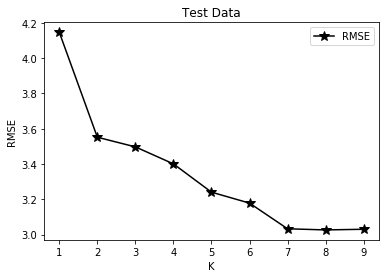

In [272]:
plt.plot(RESULTS.K,RESULTS.RMSE, '*-' , markersize = 10 , color = 'k')
plt.legend()
plt.title('Test Data')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.savefig('RMSE-K Curve',dpi=300)